## Import All Modules & Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geodatasets import get_path
import folium

# Project Level 2: Data Analysis   

## Overview  
#### In this project, we will perform four key tasks related to restaurant data analysis. Each task will involve data processing, visualization, and insights generation.

## Tasks to Perform  
1  **Restaurant Rating**  
2  **Cuisines Combination**  
3  **Geographical Analysis**  
4  **Restaurant Chains** 

In [53]:
# Import Data by using read.csv

df = pd.read_csv('Dataset.csv')

In [54]:
# Find the Shape of data( No of rows and colums)

print(df.shape)

(9551, 21)


In [55]:
# Difine the Column Names

print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [56]:
# Difine the Data ( Datatype, Columns, Nullvalues)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Restaurant Rating:

###  (1)Analyze the distribution of aggregate rating and determine the most common rating range.

In [57]:
rating_distribution=df['Aggregate rating'].value_counts()
print(rating_distribution)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [58]:
common_rating=rating_distribution.idxmax()
print('Most common rating by user:', common_rating)

Most common rating by user: 0.0


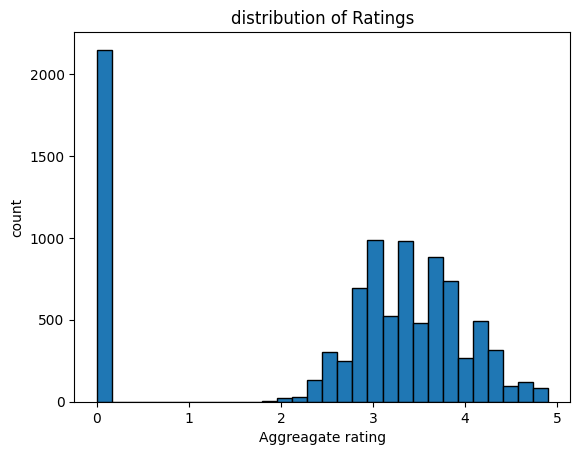

In [59]:
plt.hist(df['Aggregate rating'], bins=30, edgecolor='black')
plt.xlabel('Aggreagate rating')
plt.ylabel('count')
plt.title('distribution of Ratings')
plt.show()

## Task 1: Restaurant Rating:

### (2) Calculate the Avg No of Votes recevied by restaurants.

In [60]:
avg_vote=round(df['Votes'].mean(),2)
print('Average Votes recevied by Restaurant:', avg_vote)

Average Votes recevied by Restaurant: 156.91


## Task 2: Cuissine Combination

### (1) Identify the most common combinations pf Cuisine in the dataset

In [61]:
common_cuisine_combo= df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top_combo=common_cuisine_combo.head()
print(top_combo)

Cuisines
Italian, Deli              4.9
Hawaiian, Seafood          4.9
American, Sandwich, Tea    4.9
Continental, Indian        4.9
European, Asian, Indian    4.9
Name: Aggregate rating, dtype: float64


## Task 2: Cuissine Combination

### (2) Determine if certain Cuisine combination tend to have higher rating

In [62]:
max_rating=common_cuisine_combo.iloc[0]
max_rated_reataurant=df.loc[df['Aggregate rating']==max_rating, ['Restaurant Name', 'Aggregate rating']]
print('Max rated Restaurants:', max_rated_reataurant)

Max rated Restaurants:                                Restaurant Name  Aggregate rating
3                                         Ooma               4.9
8     Spiral - Sofitel Philippine Plaza Manila               4.9
10                            Silantro Fil-Mex               4.9
39                                  Coco Bambu               4.9
48                          Braseiro da G��vea               4.9
...                                        ...               ...
9484            Restaurant Mosaic @ The Orient               4.9
9514                          Ministry of Crab               4.9
9524                              Gaga Manjero               4.9
9538                                 Starbucks               4.9
9540                          Draft Gastro Pub               4.9

[61 rows x 2 columns]


## Task 3: Geographical analysis

### (1) Plot the location of restaurant on a map using Longitude & Latitude coordinations

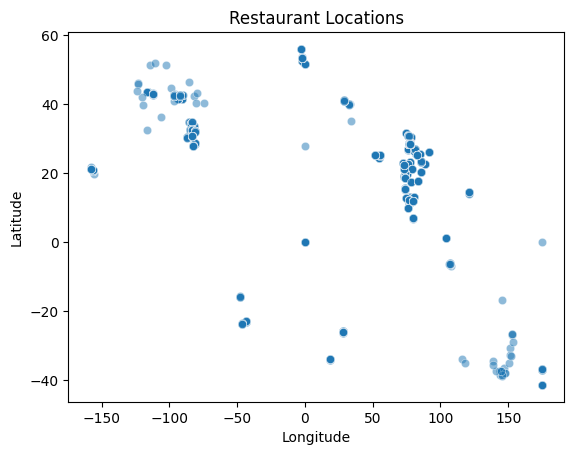

In [63]:
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], alpha=0.5)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations')

# Show the plot
plt.show()

In [68]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude), 
                       crs="EPSG:4326")  # Correct function call

print(gdf.head()) 

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

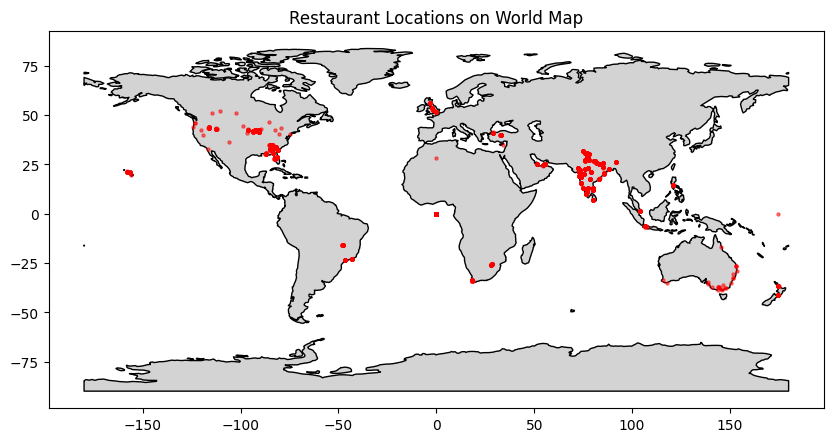

In [69]:
world = gpd.read_file(get_path("naturalearth.land"))

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black")  # Base map
gdf.plot(ax=ax, marker="o", color="red", markersize=5, alpha=0.5)  # Restaurants

plt.title("Restaurant Locations on World Map")
plt.show()

## Task 3: Geographical analysis

### (2) Identify any patterns or clusters of restaurants in speci

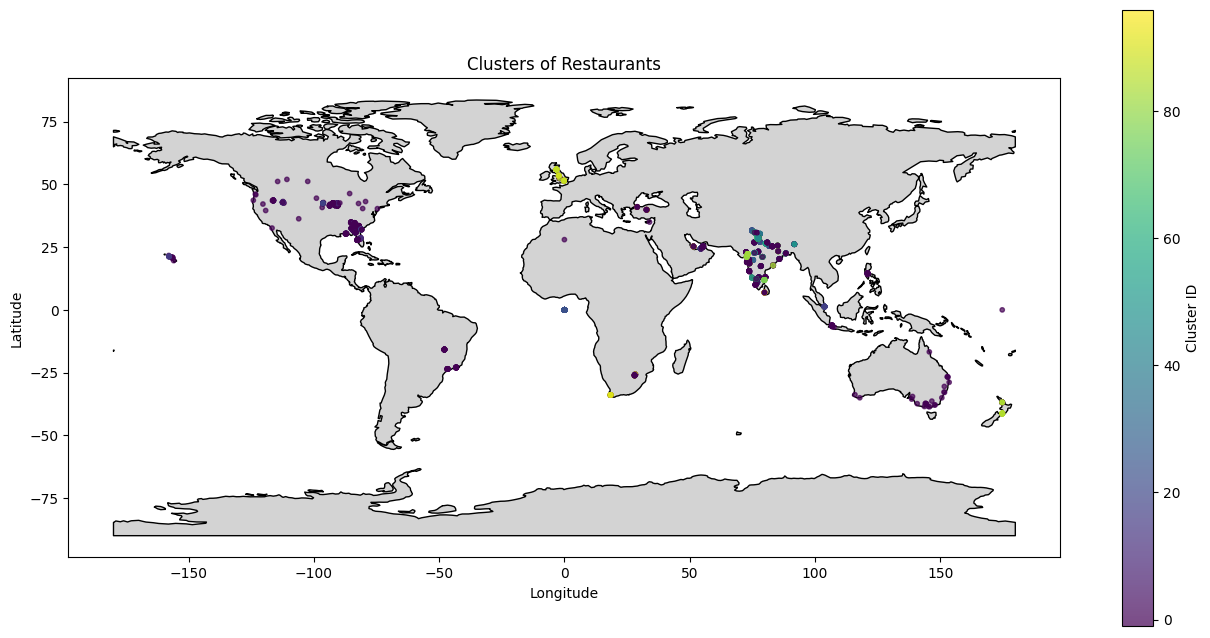

In [80]:
from sklearn.cluster import DBSCAN

coords = df[['Latitude', 'Longitude']].values  
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)  
df['Cluster'] = db.labels_  
world = gpd.read_file(get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(16, 8))
world.plot(ax=ax, color="lightgray", edgecolor="black")
scatter = ax.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=10, alpha=0.7)

plt.colorbar(scatter, label="Cluster ID")
plt.title("Clusters of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Task 4: Restaurant Chains

### (1) Indentify if there are any restaurant chains present in the dataset.

In [82]:
restaurant_chain = df.groupby('Restaurant Name').size().reset_index(name='Outletcount')
new = restaurant_chain[restaurant_chain['Outletcount'] > 1]
restaurant_chains = new.sort_values(by = 'Outletcount', ascending = False)
print(restaurant_chains[['Restaurant Name', 'Outletcount']].head())

       Restaurant Name  Outletcount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48


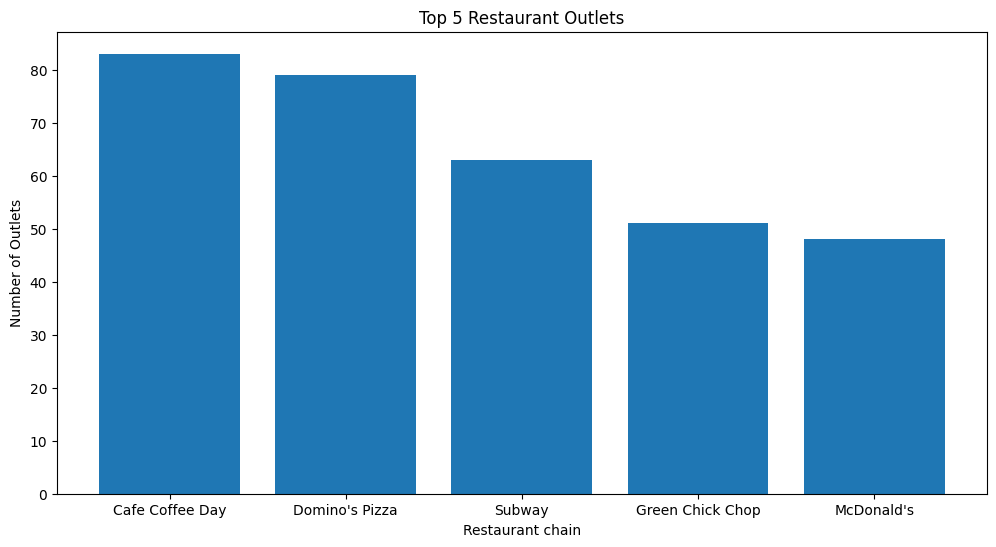

In [86]:
plt.subplots(figsize=(12, 6))
plt.bar(restaurant_chains['Restaurant Name'][:5], restaurant_chains['Outletcount'][:5])
plt.xlabel('Restaurant chain')
plt.ylabel('Number of Outlets')
plt.title('Top 5 Restaurant Outlets')
plt.show()

## Task 4: Restaurant Chains

### (2) Analyze the rating and popularity of different restaurant chains.

In [97]:
ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name='Average rating').sort_values('Average rating' , ascending=False)
print(ratings)


                      Restaurant Name  Average rating
5322   Restaurant Mosaic @ The Orient             4.9
4177                 Ministry of Crab             4.9
4135                            Miann             4.9
5757          Shorts Burger and Shine             4.9
4165                            Milse             4.9
...                               ...             ...
1105                      Cafe Corner             0.0
4905                  Pheva Tandooris             0.0
4913                     Pick & Carry             0.0
1096                     Cafe Brownie             0.0
2292  Famous Parantha and Poori Sabzi             0.0

[7446 rows x 2 columns]


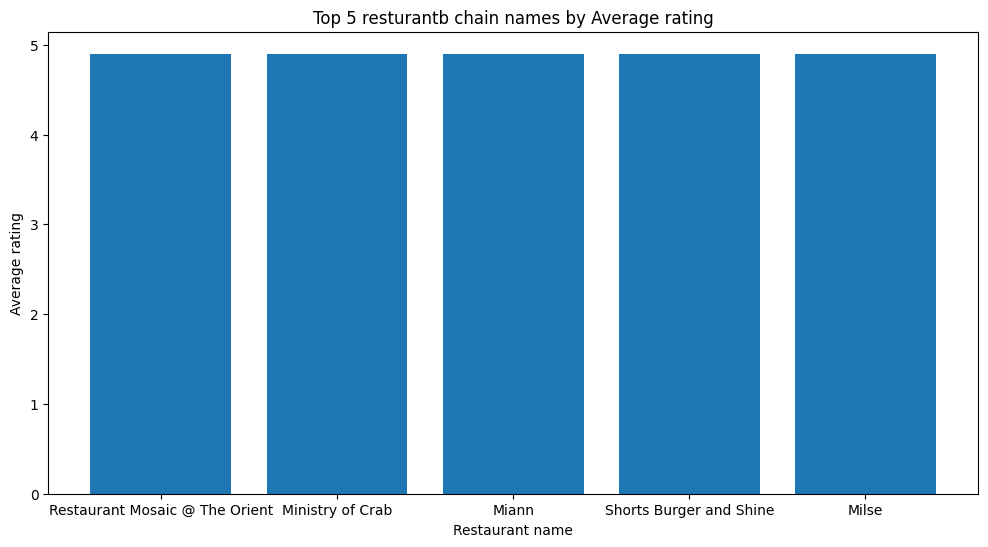

In [100]:
plt.subplots(figsize=(12, 6))
plt.bar(ratings['Restaurant Name'][:5], ratings['Average rating'][:5])
plt.xlabel('Restaurant name')
plt.ylabel('Average rating')
plt.title('Top 5 resturantb chain names by Average rating')
plt.show()